# Изучение закономерностей, обуславливающих успешность игр

Настоящий проект будет реализован на данных об играх : жанре, объемах продаж, платформах, оценках юзеров и критиков. Определенные игры пользуются большим успехом, чем иные, поэтому мы задаемся вопросом определения наиболее явных закономерностей, которые определяют успешность игры или ее неуспешность. потенциально результаты могут быть полезны для определения дальнейшей стратегии продаж.

Цель: выявить закономерности, определяющие успешность игры

Использовать следующие факторы и характеристики для оценки:
- данные о продажах компьютерных игр 
- оценки пользователей и экспертов
- жанры
- платформы

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
try:
    dataset=pd.read_csv('Desktop/Data_sets/games.csv')
except:
    dataset=pd.read_csv('/datasets/games.csv')

# Общая информация

In [3]:
dataset.columns=dataset.columns.str.lower()

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Типы переменных
year_of_release - лучше формат int, потому что это числовое значение 
user_score должен быть так же float64, как и critic_score, потому что это числовая величина

In [5]:
dataset['year_of_release']=dataset['year_of_release'].astype('Int64')

In [6]:
dataset.loc[dataset['user_score']=='tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [7]:
dataset['user_score']=pd.to_numeric(dataset['user_score'],errors='coerce') #Сделали значения tbd - NA

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


# Пропуски 

Смотря на переменные, в которых возникли прпоуски, можно определить причины.

Years of release - вероятно, что здесь пропуски допущены из-за технических ограничений, некоторые игры переносятся, даты забываются или релизное время в разных регионах разное.

critic_score - вероятно, что тут данные могли быть опущены из-за тех.ограничения в виде возможных шкал оценивания. Не все оценки выставляются по 10-бальной шкале, некоторые могут достигать и 100 баллов, поэтому определенные данные могли не считаться.

User_score - вероятно здесь и особенность переменной и особенность сбора данных : игровая оценка может быть недоступна, из-за того, что игра вышла во времени, когда пользователи не могли ставить оценки играм. Так же возможны повторы причин с critic_score

Rating - вероятно причина леит в кофнликте данных - в разных странах у игр будет прокатный рейтинг разный.

In [8]:
for i in dataset.columns:
    print(i,dataset[i].isna().sum())
    print('Доля пропущенных значений от общего объема значений', (dataset[i].isna().sum()/len(dataset[i])))

name 2
Доля пропущенных значений от общего объема значений 0.00011965300628178283
platform 0
Доля пропущенных значений от общего объема значений 0.0
year_of_release 269
Доля пропущенных значений от общего объема значений 0.01609332934489979
genre 2
Доля пропущенных значений от общего объема значений 0.00011965300628178283
na_sales 0
Доля пропущенных значений от общего объема значений 0.0
eu_sales 0
Доля пропущенных значений от общего объема значений 0.0
jp_sales 0
Доля пропущенных значений от общего объема значений 0.0
other_sales 0
Доля пропущенных значений от общего объема значений 0.0
critic_score 8578
Доля пропущенных значений от общего объема значений 0.5131917439425665
user_score 9125
Доля пропущенных значений от общего объема значений 0.5459168411606342
rating 6766
Доля пропущенных значений от общего объема значений 0.4047861202512713


Определенные пропущенные значения - в name и в genre можно опустить традиционным методом, их доля крайне мала

In [9]:
dataset=dataset.dropna(subset=['name'])

In [10]:
for i in dataset.columns:
    print(i,dataset[i].isna().sum())

name 0
platform 0
year_of_release 269
genre 0
na_sales 0
eu_sales 0
jp_sales 0
other_sales 0
critic_score 8576
user_score 9123
rating 6764


Пропущенные значения в year_of_release занимают около 1.5% всех значений. Можно попробовать оставить этот показатель с пропусками, так как он не существенен.
Показатели пропусков же в critic_score и rating крайне велики, достигают от 40 до 50% всех значений и с ними необходимо работать.

### Critic_score и rating 
Показатели важный для решения будущей задачи, так как является метрикой успешности проекта. При этом пропущенные значения в своей доле очень велики, что наводит на мысли о целесообразности замены вообще. При этом для значений rating можно представить, что это игры без рейтинга.

In [11]:
dataset['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [12]:
dataset['rating']=dataset['rating'].fillna('No rating')

### User_score

Ранее было замечено, что до "принудительного" приведения к числовым значениям столбца user_score, в стобце так же было значение tbd. Оно обозначало данные, которые пока не были доступны, которые предлагалось ввести в базу данных позже. Сейчас этих данных нет, поэтому замена их на пропущенные значения казалась целесообразной.

## Summary sales

In [12]:
dataset['total_sales']=dataset['na_sales']+dataset['eu_sales']+dataset['jp_sales']+dataset['other_sales']
dataset

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,No rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,No rating,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,No rating,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,No rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,No rating,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,No rating,0.01


## Исследовательский анализ данных

#### 1

<AxesSubplot:title={'center':'Games released per year'}, xlabel='year_of_release'>

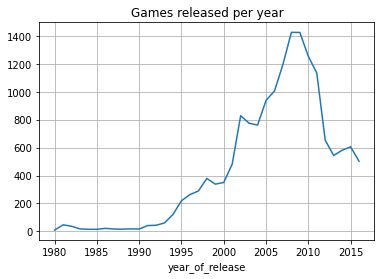

In [13]:
dataset.groupby('year_of_release')['year_of_release'].count().plot(title='Games released per year', grid=True)

<AxesSubplot:xlabel='year_of_release'>

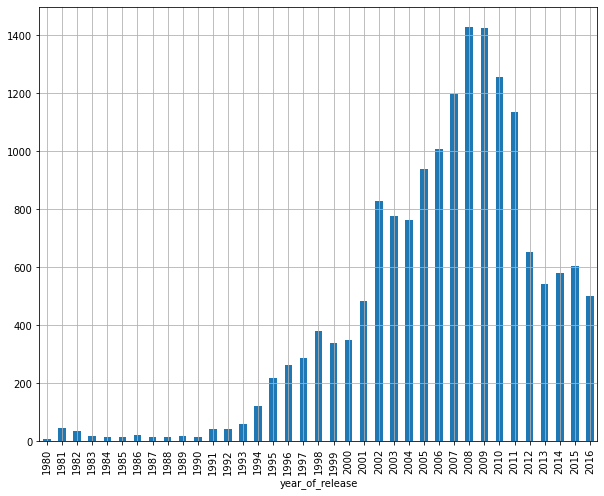

In [16]:
dataset.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar', figsize=(10,8),grid=True,legend=False)

Видно, что игровая активность начала расти бурными темпами после 2001 года, а к 2013 году игр стали выпускать на уровне 2000-х годов. Данные до 91 года не кажутся актуальными, так как их число крайне мало (около 1.5%)

In [17]:
(dataset['year_of_release']<=1991).sum()/len(dataset['year_of_release'])

0.015676419553640877

#### 2

ТОП-6 компаний наиболее сильно отличаются от других по суммарному значению продаж за все года.

In [18]:
dataset.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(6)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
Name: total_sales, dtype: float64

In [19]:
Cool_plat=['PS2','X360','PS3','Wii','DS','PS']

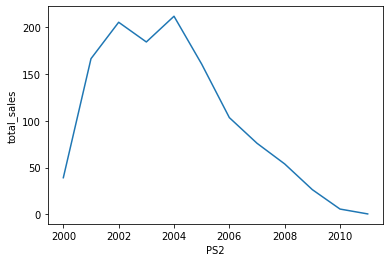

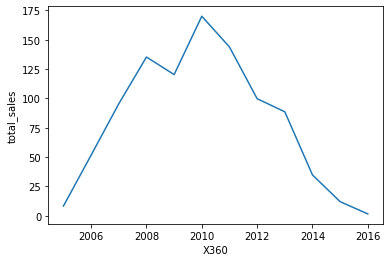

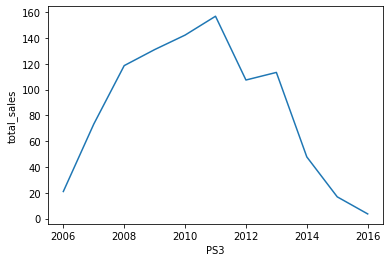

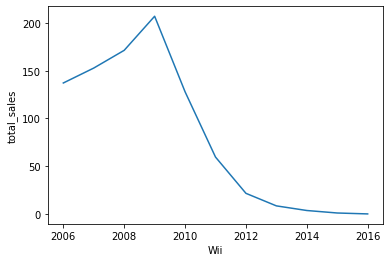

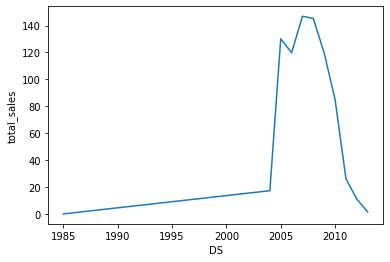

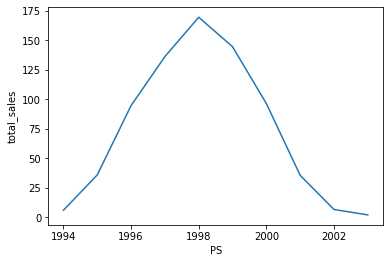

In [20]:
for i in Cool_plat:
    dataset[dataset['platform']==i].pivot_table(index='year_of_release',values='total_sales', aggfunc='sum').plot(xlabel=i, ylabel='total_sales',legend=False)

Помимо DS, платформы живут в основном около 6 лет. За 6 лет они достигают пика, а также потом снижаются.
Тогда возьмем срок с 2012-2016 для актуального исследования.

In [14]:
dataAn=dataset.loc[dataset['year_of_release']>=2012]

### 3

<AxesSubplot:xlabel='year_of_release'>

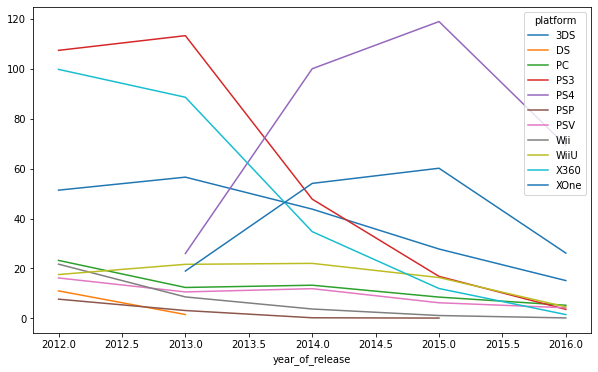

In [15]:
dataAn.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(10,6))

Заметно, что за 4 года значения продаж всех платформ снижались, хотя и разными темпами.
Лидером продаж является PS4 даже после падения с 2015 по 2016 год. Вторым лидером является плтаформа 3DS, а за ним - Xbox One. Потенциально, что плтаформы PS4 и XOne останутся лидерами продаж на ближайший год, ведь их продажи зависят от числа релизов, которые могут выправить ситуацию с падением. Наиболее сильное падение заметно у PS3 и X360, как раз вместе с появлением консолей нового поколения. Рост каких-либо платформ не сильно заметен.

### 4 

Масштаб по оси У был сокращен, чтобы избежать юольшого числа выбросов.

(0.0, 2.0)

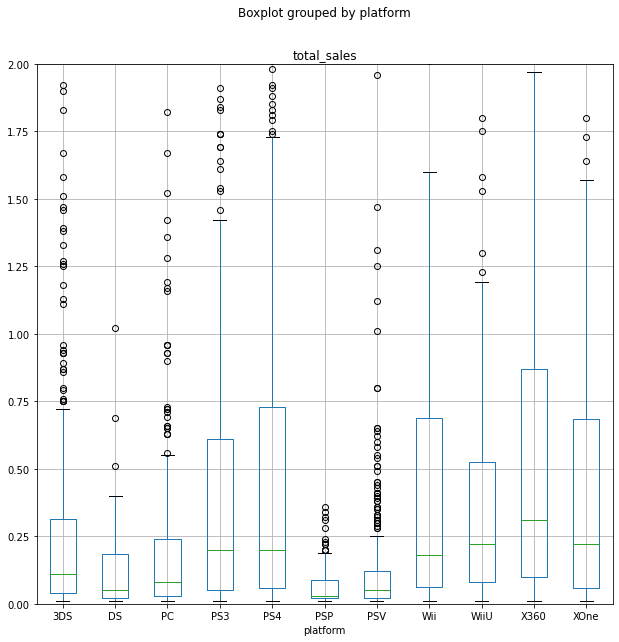

In [66]:
dataAn.boxplot(column='total_sales', by='platform', figsize=(10,10))
plt.ylim(0,2)

#Наибольшие средние общие продажи у лидеров индустрии - PS3 и PS4. Видно, что PS3 своими продажами покрывает большую часть значений, а продажи в целом больше, чем у X360 - главного конкурента. 3DS по своим средним продажам приближается к значению PS3.

Наибольшие средние продажи оказались у Х360, при этом в целом их диапазон продаж оказывается более широким и дисперсионным, чем у PS3 и PS4.PS4 при этом представляет серьезную конкуренцию X360, а Xone показывает менее внушительные результаты, чем Х360.

### 5

In [24]:
dataAn.query('platform=="PS4"')[['user_score','critic_score','total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.557654,-0.031957
critic_score,0.557654,1.000000,0.406568
total_sales,-0.031957,0.406568,1.000000


<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>

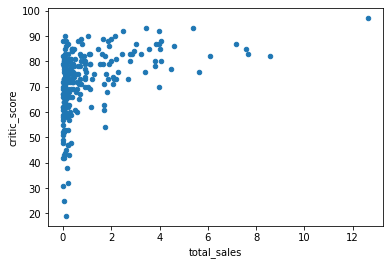

In [25]:
dataAn.query('platform=="PS4"').plot(kind='scatter', x='total_sales',y='critic_score')

<AxesSubplot:xlabel='total_sales', ylabel='user_score'>

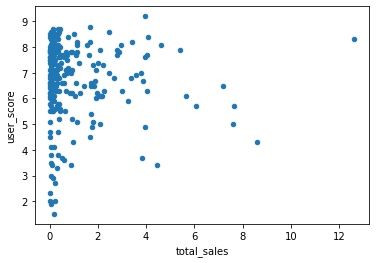

In [26]:
dataAn.query('platform=="PS4"').plot(kind='scatter', x='total_sales',y='user_score')

Явной связи между платформой PS4 и оценками юзеров, и оценками критиков не прослеживается, хотя оценки критиков более скоррелированы, чем оценки пользователей.

Связь где-то на уровне 40% между оценкой критиков и продажами

### 6

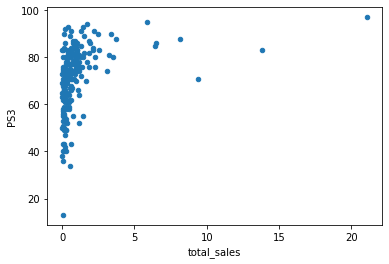

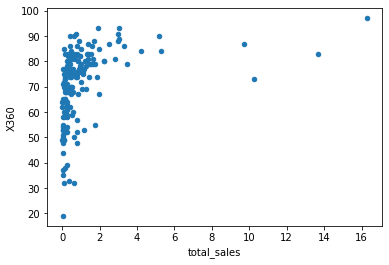

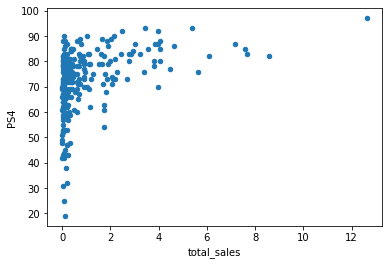

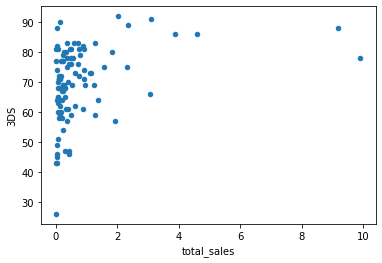

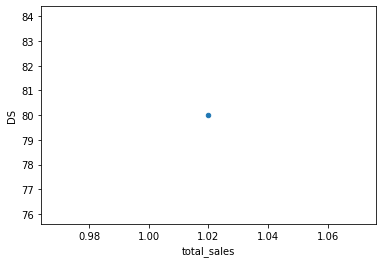

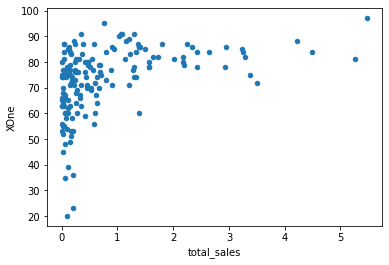

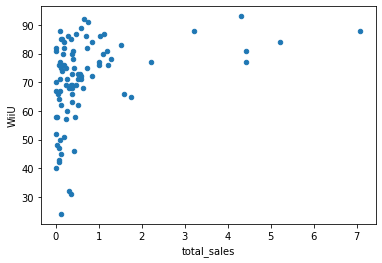

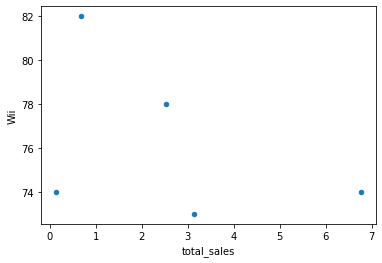

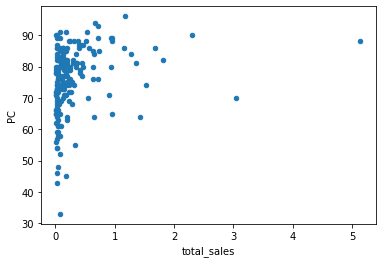

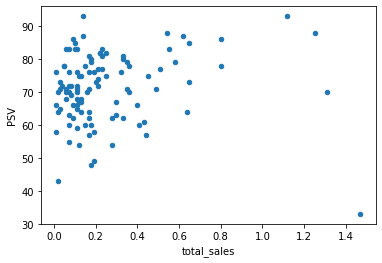

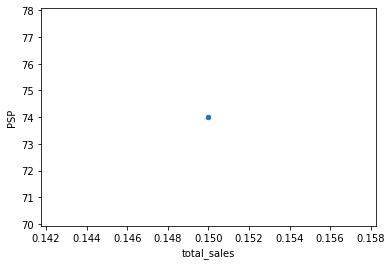

In [27]:
for i in dataAn['platform'].unique():
    dataAn.query('platform==@i').plot(x='total_sales', y='critic_score', kind='scatter', ylabel=i)

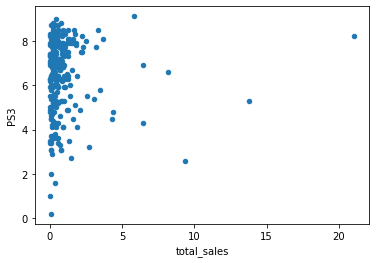

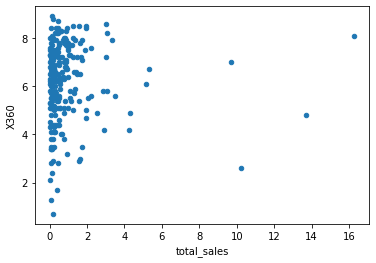

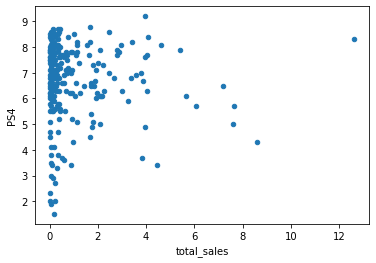

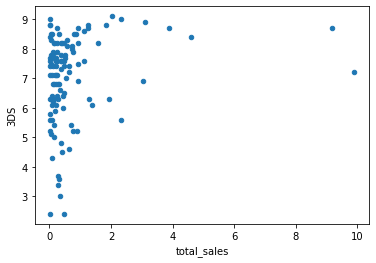

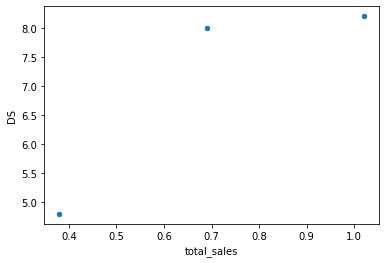

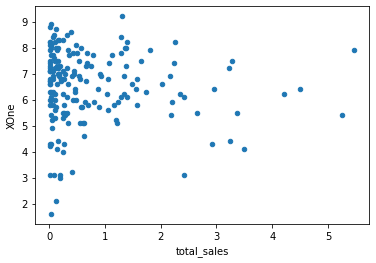

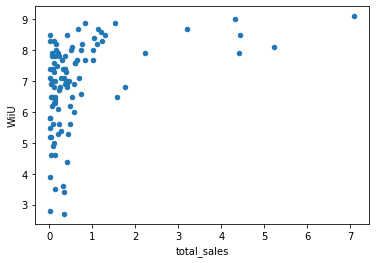

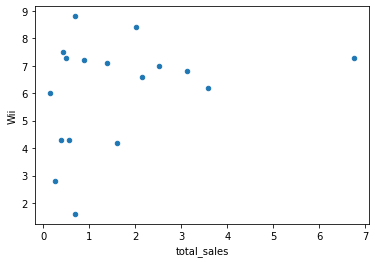

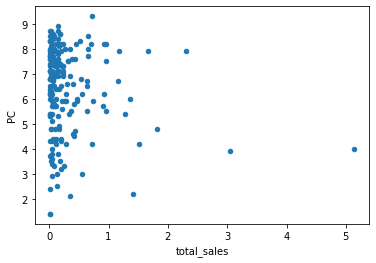

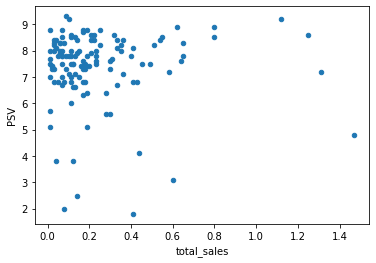

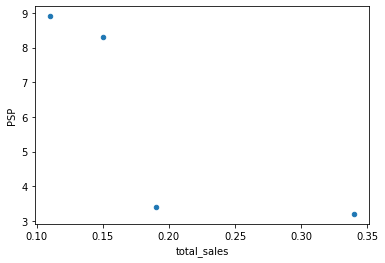

In [28]:
for i in dataAn['platform'].unique():
    dataAn.query('platform==@i').plot(x='total_sales', y='user_score', kind='scatter', ylabel=i)

Для иных платформ ситуация похожая, между оценкой критиков или пользователей и общими продажами наблюдается практически отстствие связи, либо очень слабая связь 

### 7

Жанры с наибольшим числом продаж - экшн-игры, шутеры и спортивные симуляторы, вместе с РПГ. Это игры, рассчитанные на массовую аудиторию, часто проекты, которые собирают в себе несколько характеристик для одного продукта (экшн шутер рпг). Жанры с низкими продажами - типа adventure games, fighting, racing, strategy, simulation - являются нишевыми и не всегда привлекающими внимания игроков. Более того, такие жанры более строги и не могут сочетать иные жанры в себе.

array([<AxesSubplot:ylabel='total_sales'>], dtype=object)

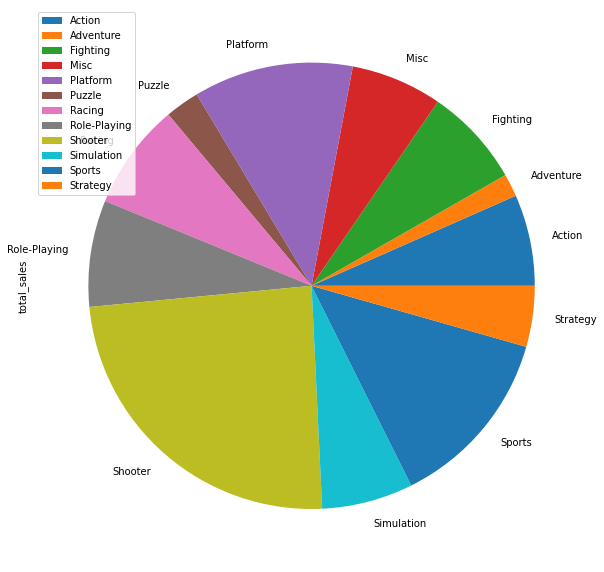

In [70]:
dataAn.pivot_table(index='genre', values='total_sales', aggfunc='median').plot(kind='pie', subplots=True, figsize=(10,15))

Наиболее высокий показатель медианных общих продаж наблюдается у категории шутеров. Игры-платформеры и спортивные симуляторы делят 2 и 3 места, а ролевые и экшн игры обладают примерно одинаковыми значениями продаж. Остальные категории распределены примерно одинаково - среди более популярных выделяются РПГ игры.

## Описание портрета геймера для каждого региона

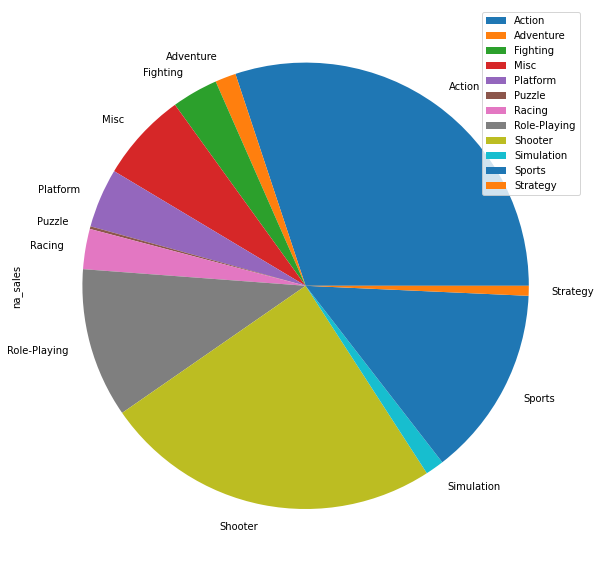

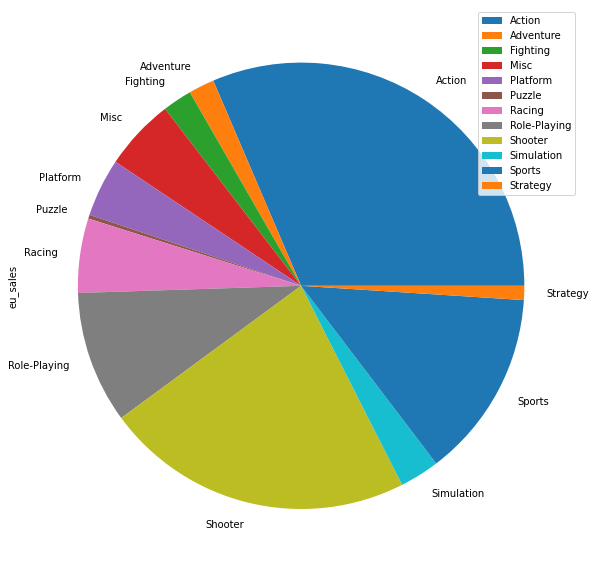

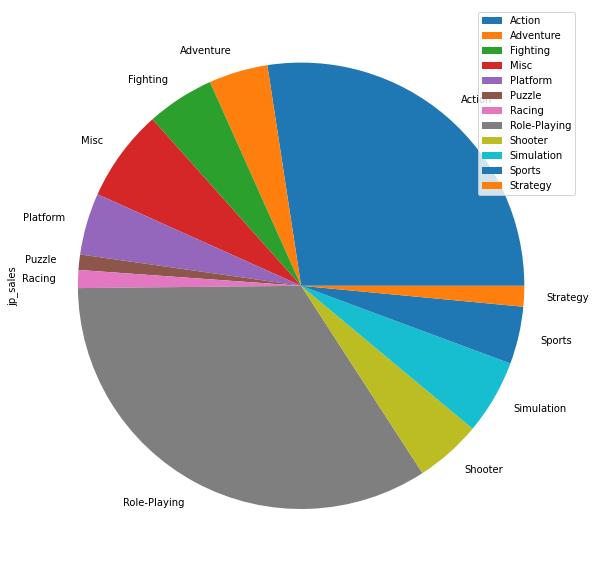

In [30]:
for i in dataAn[['na_sales','eu_sales','jp_sales']]:
    dataAn.pivot_table(index='genre', values=[i], aggfunc='sum').plot(kind='pie', subplots=True, figsize=(10,15))
    

Северная Америка : 
Геймеры предпочитают экшн-игры в своем большинстве. Шутер-игры являются вторыми по популярности, а спортивные симуляторы - на третьем. Ролевые игры приходятся на 4 место, а 5 место - игры особенного жанра, не подходящие в те категории, которые описаны в графики. Вероятно, что в Северной Америке популярны иные жанры, которые нужно исследовать

Европа : 
Категории похожи на Северную америку, только 5 место делят между собой гоночные игры и игры иных жанров.

Япония : 
В категории доминируют ролевые игры, в отличие от Америки и Европы. На втором месте находятся экшн-игры, а шутер- игры популярны не так сильно, как в иных регионах. Третье место делят между собой игры иного жанра, не представленные на графике, а также платформеры и файтинги. В целом можно сказать, что в японии распределение непопулярных жанров в целом одинаковое, в отличие от америки и европы.


## Самые популярные платформы

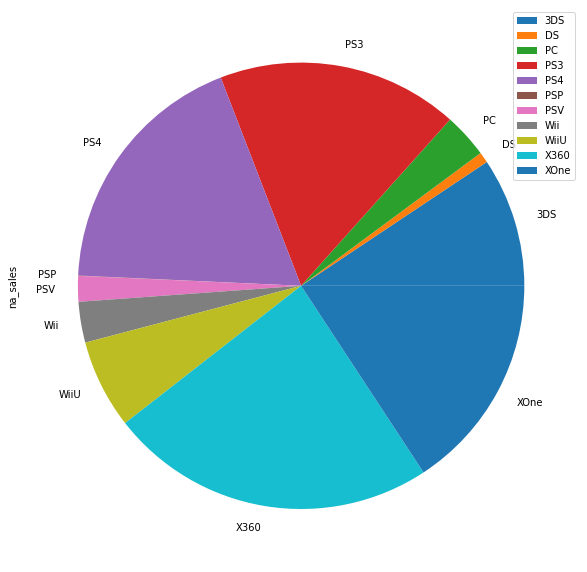

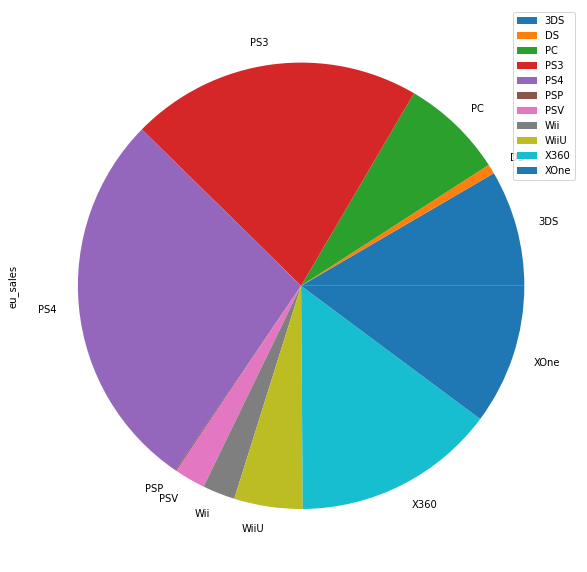

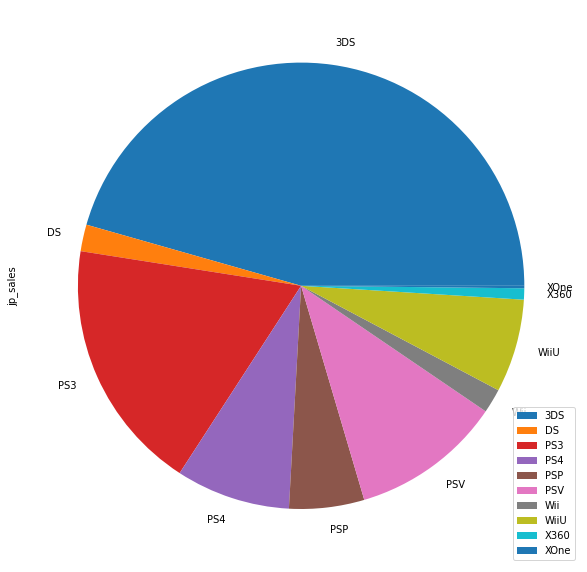

In [31]:
for i in dataAn[['na_sales','eu_sales','jp_sales']]:
    dataAn.pivot_table(index='platform', values=[i], aggfunc='sum').plot(kind='pie', subplots=True, figsize=(10,15))

Северная Америка :
Наиболее популярная платформа - X360 и Xone. Вместе с ними, лидерство удерживают PS4 и чуть менее популярна PS3. Внушительна также доля 3DS и PC.


Европа : 
Практически полным лидером является плафторма PS - PS4 и PS3. Доля PC выше, чем в иных регионах. Х360 менее популярен, чем в Северной Амкрие.

Япония :
Абсолютным лидером является платформа 3ДС. Второе место у PS3 и третье - у PS4.

# Влияет ли рейтинг на продажи в регионе? Рассмотрим США

<AxesSubplot:xlabel='rating'>

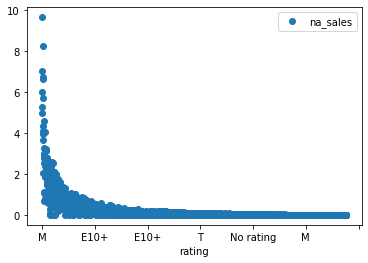

In [32]:
dataAn.plot(y='na_sales',x='rating', style='o')

<AxesSubplot:xlabel='rating'>

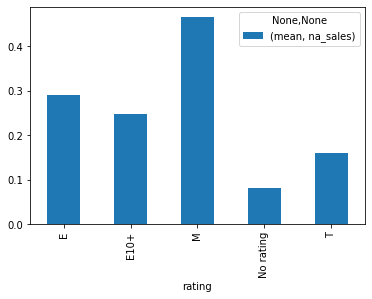

In [33]:
dataAn.pivot_table(index='rating', values='na_sales', aggfunc=['mean']).plot(kind='bar')

<AxesSubplot:xlabel='rating'>

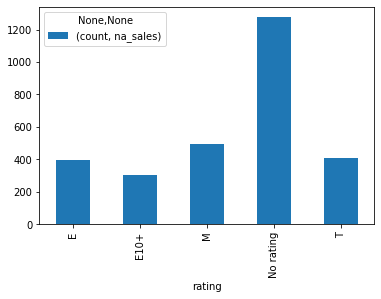

In [34]:
dataAn.pivot_table(index='rating', values='na_sales', aggfunc=['count']).plot(kind='bar')

В северной америке между рейтингами и продажами прослеживается определенная связь. Рейтинг М является наиболее популярным по продажам , объем продаж игр именно с этим рейтингом наивысший. Далее идет рейтинг E, хотя примерно суммарное число игр с рейтингом М не так сильно отличается от игр с рейтингом Е или Т или игр без рейтинга вообще.


<AxesSubplot:xlabel='rating'>

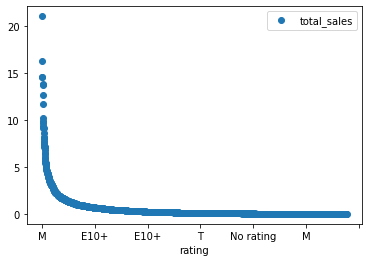

In [71]:
dataAn.plot(y='total_sales',x='rating', style='o')

<AxesSubplot:xlabel='rating'>

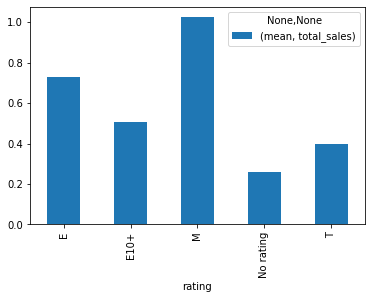

In [72]:
dataAn.pivot_table(index='rating', values='total_sales', aggfunc=['mean']).plot(kind='bar')

<AxesSubplot:xlabel='rating'>

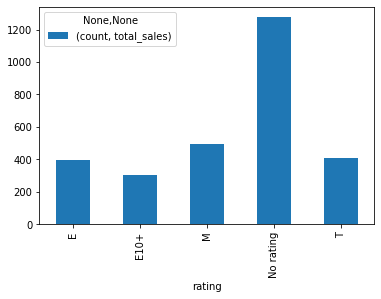

In [73]:
dataAn.pivot_table(index='rating', values='total_sales', aggfunc=['count']).plot(kind='bar')

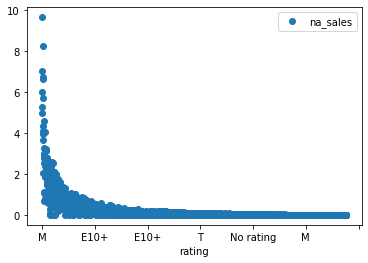

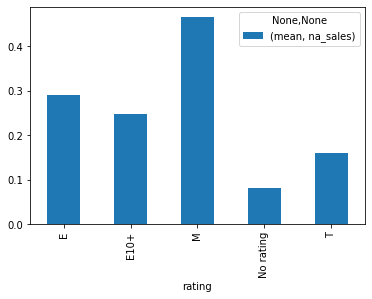

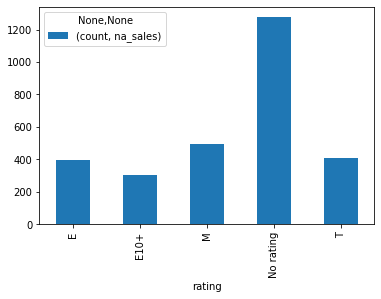

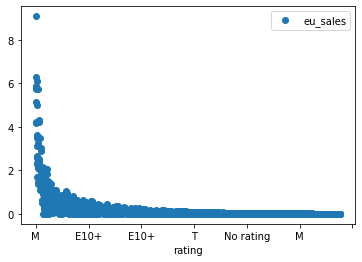

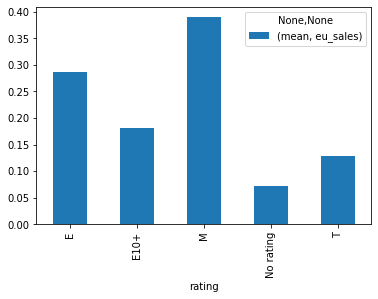

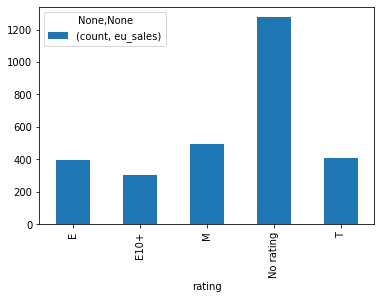

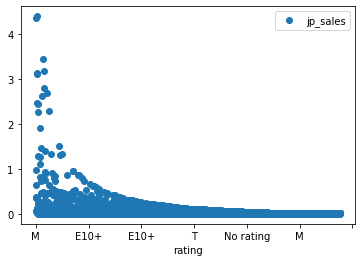

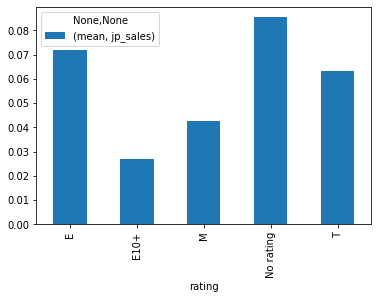

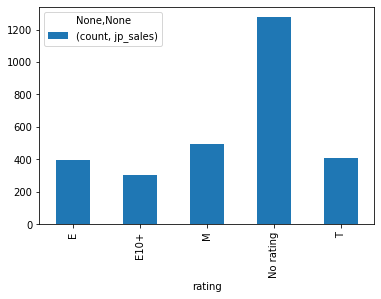

In [77]:
for i in dataAn[['na_sales','eu_sales','jp_sales']]:
    dataAn.plot(y=i,x='rating', style='o')
    dataAn.pivot_table(index='rating', values=i, aggfunc=['mean']).plot(kind='bar')
    dataAn.pivot_table(index='rating', values=i, aggfunc=['count']).plot(kind='bar')

Северная Америка : 
    В северной америке между рейтингами и продажами прослеживается определенная связь. Рейтинг М является наиболее популярным по продажам , объем продаж игр именно с этим рейтингом наивысший. Далее идет рейтинг E, хотя примерно суммарное число игр с рейтингом М не так сильно отличается от игр с рейтингом Е или Т или игр без рейтинга вообще.

Европа : 
Между рейтингами и продажами игр также прослеживается связь, игры с рейтингом М более популярны в среднем по продажам , несмотря на то, что их объем примерно схож с играми с рейтингами Е и Т. Игры с менее "детским" рейтингом покупают менее охотно, а игры без рейтинга вообще практически не берут - либо число игр без рейтинга низкое из-за того, что такие игры не проходят сертификацию

Япония : связь между рейтингами и продажами игр менее определенная. В среднем продажи наиболее высокие у игр без рейтинга или у игр с рейтингами Е и Т, хотя этих игр выпускается чуть меньше, чем игр с М рейтингом. Игры без рейтинга в целом продаются больше, чем с М, и выпускается их также сильно больше, чем остальных игр.

# Гипотезы
Обе гипотезы будут рассматриваться на разных выборках, поэтому мы сначала сформируем отдельные выборки из разных генеральных совокупностей, а затем, предполагая, что дисперсии у них равные, таак как описываются наиболее актуальные годы и платформы, узнаем p-value. Нулевые гипотезы будут предполагать равенство криетриев, а альтернативные - их отличие.

### 1

In [36]:
Xone=dataAn.query('platform=="XOne"')
PC=dataAn.query('platform=="PC"')

In [37]:
Xone['user_score'].isna().sum()

65

In [38]:
result=st.ttest_ind(Xone['user_score'].dropna(), PC['user_score'].dropna())

In [39]:
alpha=0.1

In [40]:
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу ')

Не получилось отвергнуть нулевую гипотезу 


Зададим пороговое значение ошибки в 10%, как наименее критичное ограничение для ситуации с рейтингами игр.
H0 : средние пользовательские рейтинги Xone и PC равны
H1 : средние пользовательские рейтинги Xone и PC не равны

Нулевую гипотезу отвергнуть не получилось, так как p-value сильно больше альфы, а значит, что рейтинги платформ похожи.

### 2

Зададим пороговое значение ошибки в 10%, как наименее критичное ограничение для ситуации с рейтингами игр.
H0 : средние пользовательские рейтинги жанров Экшн и Спортивных игр равны
H1 : средние пользовательские рейтинги Экшн и спортивных игр не равны

In [42]:
Action=dataAn.query('genre=="Action"')['user_score']
Sport=dataAn.query('genre=="Sports"')['user_score']

In [43]:
alpha2=0.1

In [44]:
result2=st.ttest_ind(Action.dropna(), Sport.dropna())

In [45]:
result2.pvalue

3.7163089460934874e-26

In [46]:
if result2.pvalue < alpha2:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу ')

Отвергаем нулевую гипотезу


Отвергая нулевую гипотезу, мы утверждаем, что средние пользовательские рейтинги для жанров Экшн-игр и спортивных игр разные на уровне ДВ - 90%. 

# Общий вывод 
1.Было установлено, что средний срок жизни платформы - 4-6 лет. После этого срока выходят новые поколения консолей или иных платформ, после чего интерес к покупке продуктов на старом поколении утихает. 

2.Наиболее популярными игровыми платформами являются консоли - PS3-4 и Xbox-XOne

3.Наиболее высокий показатель медианных общих продаж наблюдается у категории шутеров. Игры-платформеры и спортивные симуляторы делят 2 и 3 места, а ролевые и экшн игры обладают примерно одинаковыми значениями продаж. Остальные категории распределены примерно одинаково - среди более популярных выделяются РПГ игры.

4.По регионам наблюдаются различия как в жанрах продуктов, так и в предпочитаемых платформах.

В Японии наиболее популярной игровой платформой является 3DS, в Америке - X360, а в Европе - серия PS. Вероятно, это связано с региональными предложениями компаний для игроков.

По жанрам в Северной Америке и Европе наблюдается сходство.  Геймеры предпочитают экшн-игры и шутеры, спортивные симуляторы, в то время как в Японии - РПГ как жанр наиболее популярный, по сравнению с иными регионами.

По регионам можно сказать, что влияние рейтинга присутствует, но оно разнонаправленное. В Японии ценятся игры с возрастным рейтингом "Для всех", в то время как в Европе и США - преимущественно для взрослых, что снова связано с региональными особенностями. Более того, средние продажи игр по жанрам также отличаются, в Японии наибольшие средние продажи у игр без рейтинга, а в Северной Америке и Европе - с рейтингом М. 

5.
Интересно, что пользовательские рейтинги оказались не различимы для разных платформ - Xone и PC.  Вероятно, здесь возможен рост рынка PC для Америки и Европы.

Средние пользовательские рейтинги жанров же Action и Sports оказались разными.

Для будущих исследований интересно было бы изучить частоту выхода игр того или иного жанра по регионам, чтобы оценить, какие жанры чаще всего присутствуют на полках для разных пользователей. Также было бы интересно сравнить изменение игровых предпчо